# Lab 3: Breast Cancer Diagnosis & Prognosis

## Maya Deshpande
## USC ID: 8590996325

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, metrics, model_selection, svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

#%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
!pip install imblearn

# 1. Breast Cancer Diagnosis

## A) Download and read in the WDBC data from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [3]:
names = ['id','class','radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(data, names=names)
df

id class  radius  texture  perimeter    area  smoothness  \
0      842302     M   17.99    10.38     122.80  1001.0     0.11840   
1      842517     M   20.57    17.77     132.90  1326.0     0.08474   
2    84300903     M   19.69    21.25     130.00  1203.0     0.10960   
3    84348301     M   11.42    20.38      77.58   386.1     0.14250   
4    84358402     M   20.29    14.34     135.10  1297.0     0.10030   
..        ...   ...     ...      ...        ...     ...         ...   
564    926424     M   21.56    22.39     142.00  1479.0     0.11100   
565    926682     M   20.13    28.25     131.20  1261.0     0.09780   
566    926954     M   16.60    28.08     108.30   858.1     0.08455   
567    927241     M   20.60    29.33     140.10  1265.0     0.11780   
568     92751     B    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave points  ...  worst radius  worst texture  \
0        0.27760    0.30010         0.14710  ...        25.380          17.33   
1        0.07864    0.08690         0.07017  ...        24.990          23.41   
2        0.15990    0.19740         0.12790  ...        23.570          25.53   
3        0.28390    0.24140         0.10520  ...        14.910          26.50   
4        0.13280    0.19800         0.10430  ...        22.540          16.67   
..           ...        ...             ...  ...           ...            ...   
564      0.11590    0.24390         0.13890  ...        25.450          26.40   
565      0.10340    0.14400         0.09791  ...        23.690          38.25   
566      0.10230    0.09251         0.05302  ...        18.980          34.12   
567      0.27700    0.35140         0.15200  ...        25.740          39.42   
568      0.04362    0.00000         0.00000  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     worst fractal dimension  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                    0.17300  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[569 rows x 32 columns]

In [4]:
df = df.drop('id', axis=1)
df

class  radius  texture  perimeter    area  smoothness  compactness  \
0       M   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1       M   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2       M   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3       M   11.42    20.38      77.58   386.1     0.14250      0.28390   
4       M   20.29    14.34     135.10  1297.0     0.10030      0.13280   
..    ...     ...      ...        ...     ...         ...          ...   
564     M   21.56    22.39     142.00  1479.0     0.11100      0.11590   
565     M   20.13    28.25     131.20  1261.0     0.09780      0.10340   
566     M   16.60    28.08     108.30   858.1     0.08455      0.10230   
567     M   20.60    29.33     140.10  1265.0     0.11780      0.27700   
568     B    7.76    24.54      47.92   181.0     0.05263      0.04362   

     concavity  concave points  symmetry  ...  worst radius  worst texture  \
0      0.30010         0.14710    0.2419  ...        25.380          17.33   
1      0.08690         0.07017    0.1812  ...        24.990          23.41   
2      0.19740         0.12790    0.2069  ...        23.570          25.53   
3      0.24140         0.10520    0.2597  ...        14.910          26.50   
4      0.19800         0.10430    0.1809  ...        22.540          16.67   
..         ...             ...       ...  ...           ...            ...   
564    0.24390         0.13890    0.1726  ...        25.450          26.40   
565    0.14400         0.09791    0.1752  ...        23.690          38.25   
566    0.09251         0.05302    0.1590  ...        18.980          34.12   
567    0.35140         0.15200    0.2397  ...        25.740          39.42   
568    0.00000         0.00000    0.1587  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     worst fractal dimension  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                    0.17300  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[569 rows x 31 columns]

In [5]:
# Change labels B/M to 0/1 using Label Encoder

# Create instance of label encoder and fit to dataframe on class feature
le = LabelEncoder()
diagnosis_label = le.fit_transform(df['class'])

# Drop old B/M labels from data set
df = df.drop('class', axis=1)

# Add new 0/1 labels to data set
df['class'] = diagnosis_label
df

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     17.99    10.38     122.80  1001.0     0.11840      0.27760    0.30010   
1     20.57    17.77     132.90  1326.0     0.08474      0.07864    0.08690   
2     19.69    21.25     130.00  1203.0     0.10960      0.15990    0.19740   
3     11.42    20.38      77.58   386.1     0.14250      0.28390    0.24140   
4     20.29    14.34     135.10  1297.0     0.10030      0.13280    0.19800   
..      ...      ...        ...     ...         ...          ...        ...   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   
568    7.76    24.54      47.92   181.0     0.05263      0.04362    0.00000   

     concave points  symmetry  fractal dimension  ...  worst texture  \
0           0.14710    0.2419            0.07871  ...          17.33   
1           0.07017    0.1812            0.05667  ...          23.41   
2           0.12790    0.2069            0.05999  ...          25.53   
3           0.10520    0.2597            0.09744  ...          26.50   
4           0.10430    0.1809            0.05883  ...          16.67   
..              ...       ...                ...  ...            ...   
564         0.13890    0.1726            0.05623  ...          26.40   
565         0.09791    0.1752            0.05533  ...          38.25   
566         0.05302    0.1590            0.05648  ...          34.12   
567         0.15200    0.2397            0.07016  ...          39.42   
568         0.00000    0.1587            0.05884  ...          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     worst fractal dimension  class  
0                    0.11890      1  
1                    0.08902      1  
2                    0.08758      1  
3                    0.17300      1  
4                    0.07678      1  
..                       ...    ...  
564                  0.07115      1  
565                  0.06637      1  
566                  0.07820      1  
567                  0.12400      1  
568                  0.07039      0  

[569 rows x 31 columns]

## B) Choose the first 30 malignant cases and the first 50 benign cases in the data set as the test set and the rest as the training set.

In [6]:
# Select all instances labeled B as benign and all instances labeled M as malignant.
benign = df[df['class'] == 0]
malignant = df[df['class'] == 1]

# Select the first 30 instances of label B and first 50 instances of label M to be in test set.
test_benign = benign[0:50]
test_malignant = malignant[0:30]
test_set = pd.concat([test_benign, test_malignant])

# Select the the rest of the instances to be in training set.
training_benign = benign[50:]
training_malignant = malignant[30:]
training_set = pd.concat([training_benign, training_malignant])

In [7]:
# Rearrange order of columns in training and test sets so it's easier to separate into x and y sets
training_set = training_set[['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension','class']]

test_set = test_set[['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension','class']]

In [8]:
# Separate training set into x_training and y_training
x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 30].values

# Separate test set into x_test and y_test
x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 30].values

In [9]:
training_set

radius  texture  perimeter    area  smoothness  compactness  concavity  \
123   14.50    10.89      94.28   640.7     0.11010      0.10990    0.08842   
124   13.37    16.39      86.10   553.5     0.07115      0.07325    0.08092   
125   13.85    17.21      88.44   588.7     0.08785      0.06136    0.01420   
128   15.10    16.39      99.58   674.5     0.11500      0.18070    0.11380   
130   12.19    13.29      79.08   455.8     0.10660      0.09509    0.02855   
..      ...      ...        ...     ...         ...          ...        ...   
563   20.92    25.09     143.00  1347.0     0.10990      0.22360    0.31740   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   

     concave points  symmetry  fractal dimension  ...  worst texture  \
123         0.05778    0.1856            0.06402  ...          15.98   
124         0.02800    0.1422            0.05823  ...          22.75   
125         0.01141    0.1614            0.05890  ...          23.58   
128         0.08534    0.2001            0.06467  ...          18.33   
130         0.02882    0.1880            0.06471  ...          17.81   
..              ...       ...                ...  ...            ...   
563         0.14740    0.2149            0.06879  ...          29.41   
564         0.13890    0.1726            0.05623  ...          26.40   
565         0.09791    0.1752            0.05533  ...          38.25   
566         0.05302    0.1590            0.05648  ...          34.12   
567         0.15200    0.2397            0.07016  ...          39.42   

     worst perimeter  worst area  worst smoothness  worst compactness  \
123           102.80       745.5            0.1313             0.1788   
124            91.99       632.1            0.1025             0.2531   
125           100.30       725.9            0.1157             0.1350   
128           105.90       762.6            0.1386             0.2883   
130            91.38       545.2            0.1427             0.2585   
..               ...         ...               ...                ...   
563           179.10      1819.0            0.1407             0.4186   
564           166.10      2027.0            0.1410             0.2113   
565           155.00      1731.0            0.1166             0.1922   
566           126.70      1124.0            0.1139             0.3094   
567           184.60      1821.0            0.1650             0.8681   

     worst concavity  worst concave points  worst symmetry  \
123          0.25600               0.12210          0.2889   
124          0.33080               0.08978          0.2048   
125          0.08115               0.05104          0.2364   
128          0.19600               0.14230          0.2590   
130          0.09915               0.08187          0.3469   
..               ...                   ...             ...   
563          0.65990               0.25420          0.2929   
564          0.41070               0.22160          0.2060   
565          0.32150               0.16280          0.2572   
566          0.34030               0.14180          0.2218   
567          0.93870               0.26500          0.4087   

     worst fractal dimension  class  
123                  0.08006      0  
124                  0.07628      0  
125                  0.07182      0  
128                  0.07779      0  
130                  0.09241      0  
..                       ...    ...  
563                  0.09873      1  
564                  0.07115      1  
565                  0.06637      1  
566                  0.07820      1  
567                  0.12400      1  

[489 rows x 31 columns]

In [10]:
# Check that x_test, y_test, x_training, and y_training look right.
print("x-test")
print(x_test)
print("y-test")
print(y_test)
print("x-training")
print(x_training)
print("y-training")
print(y_training)

x-test
[[1.354e+01 1.436e+01 8.746e+01 ... 1.288e-01 2.977e-01 7.259e-02]
 [1.308e+01 1.571e+01 8.563e+01 ... 7.283e-02 3.184e-01 8.183e-02]
 [9.504e+00 1.244e+01 6.034e+01 ... 6.227e-02 2.450e-01 7.773e-02]
 ...
 [1.863e+01 2.511e+01 1.248e+02 ... 1.848e-01 3.444e-01 9.782e-02]
 [1.184e+01 1.870e+01 7.793e+01 ... 1.546e-01 4.761e-01 1.402e-01]
 [1.702e+01 2.398e+01 1.128e+02 ... 1.847e-01 3.530e-01 8.482e-02]]
y-test
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
x-training
[[1.450e+01 1.089e+01 9.428e+01 ... 1.221e-01 2.889e-01 8.006e-02]
 [1.337e+01 1.639e+01 8.610e+01 ... 8.978e-02 2.048e-01 7.628e-02]
 [1.385e+01 1.721e+01 8.844e+01 ... 5.104e-02 2.364e-01 7.182e-02]
 ...
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-

## C) Binary Classification Using Logistic Regression

### i) Depict scatter plots of the features in your training set in a scatter matrix.

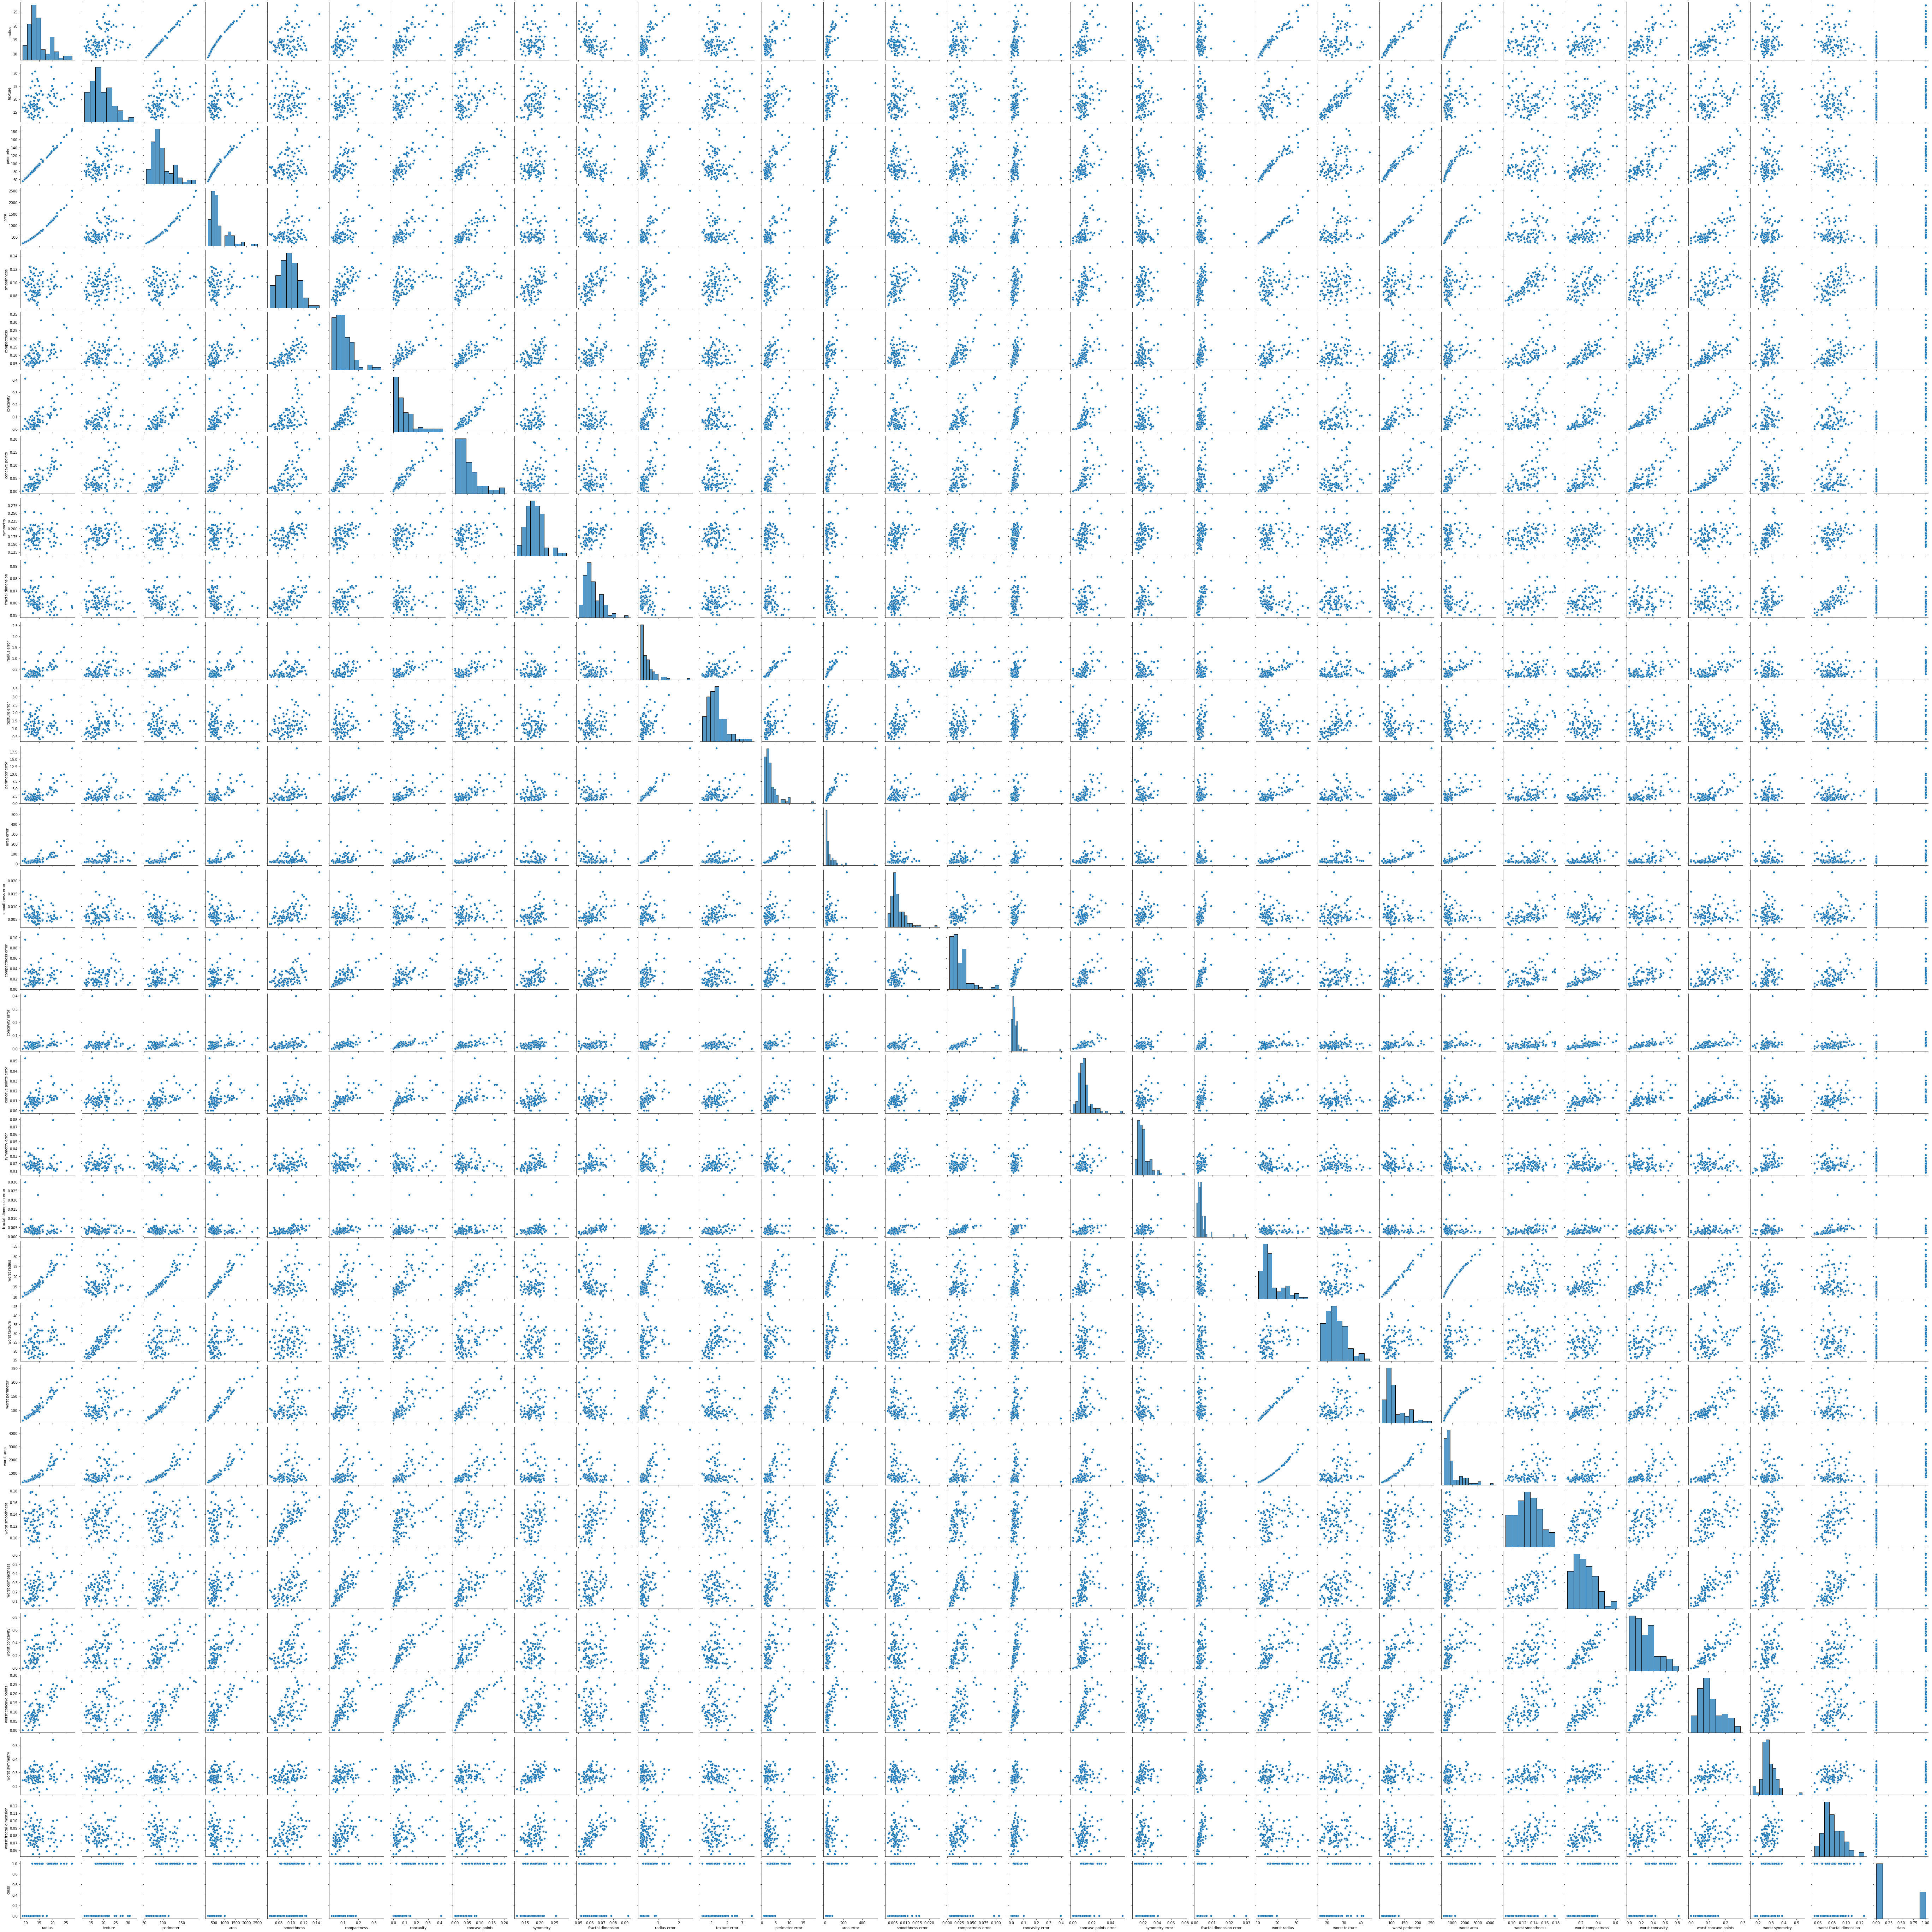

In [11]:
%matplotlib inline

# The below scatterplots have been generated using a sample of the training set. 
# I was told by TA's that as long as we showed that our scatterplots worked, we could submit this lab using only
# a sample of the training set so that we wouldn't use so much computation time.
sns.pairplot(training_set.sample(frac=0.20))

### ii) Use logistic regression to solve the binary classification problem. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

In [12]:
# Create a logistic model and fit to training data.
logistic_model = LogisticRegression()
logistic_model.fit(x_training, y_training)

LogisticRegression()

In [13]:
x_training.shape
y_training

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
# Pass x_training through model to get y_training_predicted
y_training_predicted = logistic_model.predict(x_training)
y_training_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# Pass x_test through model to get y_test_predicted
y_test_predicted = logistic_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# Logistic Regression model performs poorly.
logistic_model.score(x_test,y_test)

0.9625

Summary of TRAINING SET: 

Confution matrix: 
[[298   9]
 [ 13 169]]

Precision score: 
0.949438202247191

Recall Score: 
0.9285714285714286

ROC-AUC Score:
0.9496277338296882

F1 Score: 
0.9388888888888889

ROC Curve: 


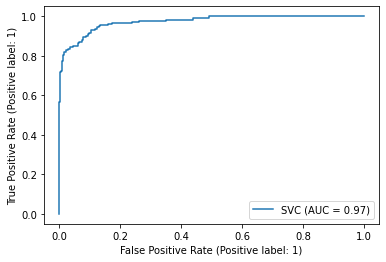

In [17]:
print("Summary of TRAINING SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_training, y_training_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_training_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_training_predicted))
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_training_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_training, y_training_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_training, y_training)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_training, y_training)  
plt.show() 

Summary of TEST SET: 

Confution matrix: 
[[49  1]
 [ 2 28]]

Precision score: 
0.9655172413793104

Recall Score: 
0.9333333333333333

ROC-AUC Score:
0.9566666666666667

F1 Score: 
0.9491525423728815

ROC Curve: 


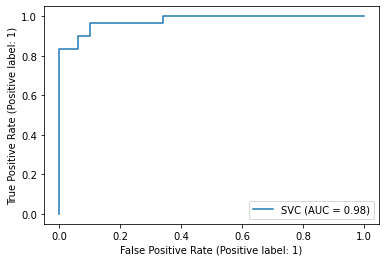

In [18]:
print("Summary of TEST SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Precision score: ")
print(precision_score(y_test, y_test_predicted))
print()

# Recall is tpr
print("Recall Score: ")
tpr = recall_score(y_test, y_test_predicted)
print(tpr)
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_test_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_test, y_test_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_test, y_test)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_test, y_test)  
plt.show() 

### iii) Calculate the p-values for your logistic regression parameters and prune those variables that are not statistically significant. Refit a logistic regression model using your pruned set of features. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

In [19]:
# Normalizing the data to find significant p-values.
scaling = MinMaxScaler()
scaled_df = scaling.fit_transform(df[['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']])

scaled_df

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [20]:
# Converting normalized data from array back into DataFrame.
scaled_df = pd.DataFrame(scaled_df, columns = ['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])

# Adding back labels in integer format.
scaled_df['class'] = diagnosis_label
scaled_df

radius   texture  perimeter      area  smoothness  compactness  \
0    0.521037  0.022658   0.545989  0.363733    0.593753     0.792037   
1    0.643144  0.272574   0.615783  0.501591    0.289880     0.181768   
2    0.601496  0.390260   0.595743  0.449417    0.514309     0.431017   
3    0.210090  0.360839   0.233501  0.102906    0.811321     0.811361   
4    0.629893  0.156578   0.630986  0.489290    0.430351     0.347893   
..        ...       ...        ...       ...         ...          ...   
564  0.690000  0.428813   0.678668  0.566490    0.526948     0.296055   
565  0.622320  0.626987   0.604036  0.474019    0.407782     0.257714   
566  0.455251  0.621238   0.445788  0.303118    0.288165     0.254340   
567  0.644564  0.663510   0.665538  0.475716    0.588336     0.790197   
568  0.036869  0.501522   0.028540  0.015907    0.000000     0.074351   

     concavity  concave points  symmetry  fractal dimension  ...  \
0     0.703140        0.731113  0.686364           0.605518  ...   
1     0.203608        0.348757  0.379798           0.141323  ...   
2     0.462512        0.635686  0.509596           0.211247  ...   
3     0.565604        0.522863  0.776263           1.000000  ...   
4     0.463918        0.518390  0.378283           0.186816  ...   
..         ...             ...       ...                ...  ...   
564   0.571462        0.690358  0.336364           0.132056  ...   
565   0.337395        0.486630  0.349495           0.113100  ...   
566   0.216753        0.263519  0.267677           0.137321  ...   
567   0.823336        0.755467  0.675253           0.425442  ...   
568   0.000000        0.000000  0.266162           0.187026  ...   

     worst texture  worst perimeter  worst area  worst smoothness  \
0         0.141525         0.668310    0.450698          0.601136   
1         0.303571         0.539818    0.435214          0.347553   
2         0.360075         0.508442    0.374508          0.483590   
3         0.385928         0.241347    0.094008          0.915472   
4         0.123934         0.506948    0.341575          0.437364   
..             ...              ...         ...               ...   
564       0.383262         0.576174    0.452664          0.461137   
565       0.699094         0.520892    0.379915          0.300007   
566       0.589019         0.379949    0.230731          0.282177   
567       0.730277         0.668310    0.402035          0.619626   
568       0.489072         0.043578    0.020497          0.124084   

     worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.619292         0.568610              0.912027        0.598462   
1             0.154563         0.192971              0.639175        0.233590   
2             0.385375         0.359744              0.835052        0.403706   
3             0.814012         0.548642              0.884880        1.000000   
4             0.172415         0.319489              0.558419        0.157500   
..                 ...              ...                   ...             ...   
564           0.178527         0.328035              0.761512        0.097575   
565           0.159997         0.256789              0.559450        0.198502   
566           0.273705         0.271805              0.487285        0.128721   
567           0.815758         0.749760              0.910653        0.497142   
568           0.036043         0.000000              0.000000        0.257441   

     worst fractal dimension  class  
0                   0.418864      1  
1                   0.222878      1  
2                   0.213433      1  
3                   0.773711      1  
4                   0.142595      1  
..                       ...    ...  
564                 0.105667      1  
565                 0.074315      1  
566                 0.151909      1  
567                 0.452315      1  
568                 0.100682      0  

[569 rows x 31 columns]

In [21]:
# Repeat test-training split for scaled data.

# Select all instances labeled B as benign and all instances labeled M as malignant.
benign_scaled = scaled_df[scaled_df['class'] == 0]
malignant_scaled = scaled_df[scaled_df['class'] == 1]

# Select the first 30 instances of label B and first 50 instances of label M to be in test set.
test_benign_scaled = benign_scaled[0:30]
test_malignant_scaled = malignant_scaled[0:50]
test_set_scaled = pd.concat([test_benign_scaled, test_malignant_scaled])

# Select the the rest of the instances to be in training set.
training_benign_scaled = benign[30:]
training_malignant_scaled = malignant[50:]
training_set_scaled = pd.concat([training_benign_scaled, training_malignant_scaled])

In [22]:
# Separate training set into x_training and y_training
x_training_scaled = training_set_scaled.iloc[:, :-1].values
y_training_scaled = training_set_scaled.iloc[:, 30].values

# Separate test set into x_test and y_test
x_test_scaled = test_set_scaled.iloc[:, :-1].values
y_test_scaled = test_set_scaled.iloc[:, 30].values

In [23]:
#sm_logistic_reg = sm.Logit(y_training_scaled, x_training_scaled).fit_regularized(maxiter=200)
sm_logistic_reg = sm.Logit(y_training_scaled, x_training_scaled).fit(maxiter = 11)
print(sm_logistic_reg.summary())

         Current function value: 0.388215
         Iterations: 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  489
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                           29
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                  0.3887
Time:                        18:56:26   Log-Likelihood:                -189.84
converged:                      False   LL-Null:                       -310.56
Covariance Type:            nonrobust   LLR p-value:                 2.309e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -47.9155     70.219     -0.682      0.495    -185.542      89.711
x2            -1.7728      2.546     -0.696      0.486      -6.76

In [24]:
training_set

radius  texture  perimeter    area  smoothness  compactness  concavity  \
123   14.50    10.89      94.28   640.7     0.11010      0.10990    0.08842   
124   13.37    16.39      86.10   553.5     0.07115      0.07325    0.08092   
125   13.85    17.21      88.44   588.7     0.08785      0.06136    0.01420   
128   15.10    16.39      99.58   674.5     0.11500      0.18070    0.11380   
130   12.19    13.29      79.08   455.8     0.10660      0.09509    0.02855   
..      ...      ...        ...     ...         ...          ...        ...   
563   20.92    25.09     143.00  1347.0     0.10990      0.22360    0.31740   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   

     concave points  symmetry  fractal dimension  ...  worst texture  \
123         0.05778    0.1856            0.06402  ...          15.98   
124         0.02800    0.1422            0.05823  ...          22.75   
125         0.01141    0.1614            0.05890  ...          23.58   
128         0.08534    0.2001            0.06467  ...          18.33   
130         0.02882    0.1880            0.06471  ...          17.81   
..              ...       ...                ...  ...            ...   
563         0.14740    0.2149            0.06879  ...          29.41   
564         0.13890    0.1726            0.05623  ...          26.40   
565         0.09791    0.1752            0.05533  ...          38.25   
566         0.05302    0.1590            0.05648  ...          34.12   
567         0.15200    0.2397            0.07016  ...          39.42   

     worst perimeter  worst area  worst smoothness  worst compactness  \
123           102.80       745.5            0.1313             0.1788   
124            91.99       632.1            0.1025             0.2531   
125           100.30       725.9            0.1157             0.1350   
128           105.90       762.6            0.1386             0.2883   
130            91.38       545.2            0.1427             0.2585   
..               ...         ...               ...                ...   
563           179.10      1819.0            0.1407             0.4186   
564           166.10      2027.0            0.1410             0.2113   
565           155.00      1731.0            0.1166             0.1922   
566           126.70      1124.0            0.1139             0.3094   
567           184.60      1821.0            0.1650             0.8681   

     worst concavity  worst concave points  worst symmetry  \
123          0.25600               0.12210          0.2889   
124          0.33080               0.08978          0.2048   
125          0.08115               0.05104          0.2364   
128          0.19600               0.14230          0.2590   
130          0.09915               0.08187          0.3469   
..               ...                   ...             ...   
563          0.65990               0.25420          0.2929   
564          0.41070               0.22160          0.2060   
565          0.32150               0.16280          0.2572   
566          0.34030               0.14180          0.2218   
567          0.93870               0.26500          0.4087   

     worst fractal dimension  class  
123                  0.08006      0  
124                  0.07628      0  
125                  0.07182      0  
128                  0.07779      0  
130                  0.09241      0  
..                       ...    ...  
563                  0.09873      1  
564                  0.07115      1  
565                  0.06637      1  
566                  0.07820      1  
567                  0.12400      1  

[489 rows x 31 columns]

Based on the above summary, there is only one feature that is significant in the model. I have chosen to drop features whose p-values are greater than 0.1 and keep features whose p-values are < 0.1.

In [25]:
# Drop features that aren't significant from training set and test set.

# Insignificant features are: (1),(2),(5),(6),(8),(9),(10),(11),(12),(13),(14),(16),(17), (19),(20),(21),(23),(24),
# (25),(26),(28),(29),(30).
training_set = training_set.drop(['radius','texture', 'smoothness','compactness','concave points',
                                  'symmetry','fractal dimension','radius error','texture error',
                                  'perimeter error','area error','compactness error','compactness error',
                                  'concavity error','symmetry error', 'fractal dimension error','worst radius',
                                  'worst perimeter', 'worst area','worst smoothness', 'worst compactness',
                                  'worst concave points', 'worst symmetry', 'worst fractal dimension'], axis = 1)
test_set = test_set.drop(['radius','texture', 'smoothness','compactness','concave points',
                                  'symmetry','fractal dimension','radius error','texture error',
                                  'perimeter error','area error','compactness error','compactness error',
                                  'concavity error','symmetry error', 'fractal dimension error','worst radius',
                                  'worst perimeter', 'worst area','worst smoothness', 'worst compactness',
                                  'worst concave points', 'worst symmetry', 'worst fractal dimension'], axis = 1)

#Significant features are: (3),(4),(7),(15),(18),(22),(27). 
# New training and test sets should have features: perimeter, area, concavity, smoothness error, concave points, error, 
# worst texture, worse concavity.

In [26]:
# Separate training set into x_training and y_training
x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 7].values

# Separate test set into x_test and y_test
x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 7].values

In [27]:
# Do logistic regression on the new training and test sets.
logistic_model = LogisticRegression()
logistic_model.fit(x_training, y_training)

LogisticRegression()

In [28]:
# Pass x_training through model to get y_training_predicted
y_training_predicted = logistic_model.predict(x_training)
y_training_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# Pass x_test through model to get y_test_predicted
y_test_predicted = logistic_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

Summary of TRAINING SET: 

Confution matrix: 
[[294  13]
 [ 18 164]]

Precision score: 
0.9265536723163842

Recall Score: 
0.9010989010989011

ROC-AUC Score:
0.9293768121129684

F1 Score: 
0.9136490250696379

ROC Curve: 


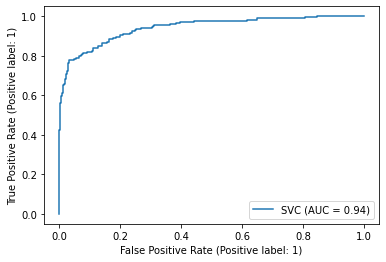

In [30]:
# Calculate confusion matrix, ROC, precision, recall, f1 score, and AUC for training set.
print("Summary of TRAINING SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_training, y_training_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_training_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_training_predicted))
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_training_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_training, y_training_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_training, y_training)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_training, y_training)  
plt.show() 

Summary of TEST SET: 

Confution matrix: 
[[49  1]
 [ 4 26]]

Precision score: 
0.9629629629629629

Recall Score: 
0.8666666666666667

ROC-AUC Score:
0.9233333333333333

F1 Score: 
0.912280701754386

ROC Curve: 


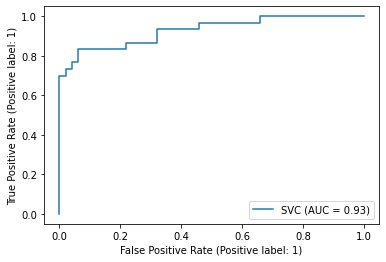

In [31]:
print("Summary of TEST SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Precision score: ")
print(precision_score(y_test, y_test_predicted))
print()

# Recall is tpr
print("Recall Score: ")
tpr = recall_score(y_test, y_test_predicted)
print(tpr)
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_test_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_test, y_test_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_test, y_test)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_test, y_test)  
plt.show() 

### iv) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes, the classes seem to be well-separated and would cause instability in calculating logistic regression parameters, as seen in the summary of p-values above.

# 2. Breast Cancer Prognosis

## A) Download the WPBC data from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

In [32]:
names = ['id','class','time','radius','texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension', 'tumor size','lymph node']
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data"
df = pd.read_csv(data, names=names)
df

id class  time  radius  texture  perimeter    area  smoothness  \
0    119513     N    31   18.02    27.60     117.50  1013.0     0.09489   
1      8423     N    61   17.99    10.38     122.80  1001.0     0.11840   
2    842517     N   116   21.37    17.44     137.50  1373.0     0.08836   
3    843483     N   123   11.42    20.38      77.58   386.1     0.14250   
4    843584     R    27   20.29    14.34     135.10  1297.0     0.10030   
..      ...   ...   ...     ...      ...        ...     ...         ...   
193  942640     N    10   22.52    21.92     146.90  1597.0     0.07592   
194  943471     N     8   15.44    31.18     101.00   740.4     0.09399   
195   94547     N    12   17.17    29.19     110.00   915.3     0.08952   
196  947204     R     3   21.42    22.84     145.00  1440.0     0.10700   
197  947489     N     6   16.70    28.13     110.30   885.4     0.08896   

     compactness  concavity  ...  worst perimeter  worst area  \
0        0.10360    0.10860  ...           139.70      1436.0   
1        0.27760    0.30010  ...           184.60      2019.0   
2        0.11890    0.12550  ...           159.10      1949.0   
3        0.28390    0.24140  ...            98.87       567.7   
4        0.13280    0.19800  ...           152.20      1575.0   
..           ...        ...  ...              ...         ...   
193      0.09162    0.06862  ...           162.10      1902.0   
194      0.10620    0.13750  ...           112.60       929.0   
195      0.06655    0.06583  ...           132.50      1295.0   
196      0.19390    0.23800  ...           198.30      2375.0   
197      0.11310    0.10120  ...           128.80      1213.0   

     worst smoothness  worst compactness  worst concavity  \
0             0.11950             0.1926           0.3140   
1             0.16220             0.6656           0.7119   
2             0.11880             0.3449           0.3414   
3             0.20980             0.8663           0.6869   
4             0.13740             0.2050           0.4000   
..                ...                ...              ...   
193           0.08191             0.1319           0.1056   
194           0.12720             0.2362           0.2975   
195           0.12610             0.1572           0.2141   
196           0.14980             0.4379           0.5411   
197           0.13300             0.2808           0.3455   

     worst concave points  worst symmetry  worst fractal dimension  \
0                 0.11700          0.2677                  0.08113   
1                 0.26540          0.4601                  0.11890   
2                 0.20320          0.4334                  0.09067   
3                 0.25750          0.6638                  0.17300   
4                 0.16250          0.2364                  0.07678   
..                    ...             ...                      ...   
193               0.09378          0.2061                  0.05788   
194               0.12860          0.2914                  0.08024   
195               0.09520          0.3362                  0.06033   
196               0.22150          0.2832                  0.08981   
197               0.13170          0.3035                  0.08036   

     tumor size  lymph node  
0           5.0           5  
1           3.0           2  
2           2.5           0  
3           2.0           0  
4           3.5           0  
..          ...         ...  
193         6.0           2  
194         1.5           0  
195         3.7           0  
196         3.0           ?  
197         3.5           0  

[198 rows x 35 columns]

In [33]:
# Drop 'time' feature.
df = df.drop('time', axis=1)
df

# Drop 'id' feature.
df = df.drop('id', axis=1)
df

class  radius  texture  perimeter    area  smoothness  compactness  \
0       N   18.02    27.60     117.50  1013.0     0.09489      0.10360   
1       N   17.99    10.38     122.80  1001.0     0.11840      0.27760   
2       N   21.37    17.44     137.50  1373.0     0.08836      0.11890   
3       N   11.42    20.38      77.58   386.1     0.14250      0.28390   
4       R   20.29    14.34     135.10  1297.0     0.10030      0.13280   
..    ...     ...      ...        ...     ...         ...          ...   
193     N   22.52    21.92     146.90  1597.0     0.07592      0.09162   
194     N   15.44    31.18     101.00   740.4     0.09399      0.10620   
195     N   17.17    29.19     110.00   915.3     0.08952      0.06655   
196     R   21.42    22.84     145.00  1440.0     0.10700      0.19390   
197     N   16.70    28.13     110.30   885.4     0.08896      0.11310   

     concavity  concave points  symmetry  ...  worst perimeter  worst area  \
0      0.10860         0.07055    0.1865  ...           139.70      1436.0   
1      0.30010         0.14710    0.2419  ...           184.60      2019.0   
2      0.12550         0.08180    0.2333  ...           159.10      1949.0   
3      0.24140         0.10520    0.2597  ...            98.87       567.7   
4      0.19800         0.10430    0.1809  ...           152.20      1575.0   
..         ...             ...       ...  ...              ...         ...   
193    0.06862         0.06367    0.1728  ...           162.10      1902.0   
194    0.13750         0.06500    0.1735  ...           112.60       929.0   
195    0.06583         0.05068    0.1793  ...           132.50      1295.0   
196    0.23800         0.13180    0.1884  ...           198.30      2375.0   
197    0.10120         0.04989    0.1890  ...           128.80      1213.0   

     worst smoothness  worst compactness  worst concavity  \
0             0.11950             0.1926           0.3140   
1             0.16220             0.6656           0.7119   
2             0.11880             0.3449           0.3414   
3             0.20980             0.8663           0.6869   
4             0.13740             0.2050           0.4000   
..                ...                ...              ...   
193           0.08191             0.1319           0.1056   
194           0.12720             0.2362           0.2975   
195           0.12610             0.1572           0.2141   
196           0.14980             0.4379           0.5411   
197           0.13300             0.2808           0.3455   

     worst concave points  worst symmetry  worst fractal dimension  \
0                 0.11700          0.2677                  0.08113   
1                 0.26540          0.4601                  0.11890   
2                 0.20320          0.4334                  0.09067   
3                 0.25750          0.6638                  0.17300   
4                 0.16250          0.2364                  0.07678   
..                    ...             ...                      ...   
193               0.09378          0.2061                  0.05788   
194               0.12860          0.2914                  0.08024   
195               0.09520          0.3362                  0.06033   
196               0.22150          0.2832                  0.08981   
197               0.13170          0.3035                  0.08036   

     tumor size  lymph node  
0           5.0           5  
1           3.0           2  
2           2.5           0  
3           2.0           0  
4           3.5           0  
..          ...         ...  
193         6.0           2  
194         1.5           0  
195         3.7           0  
196         3.0           ?  
197         3.5           0  

[198 rows x 33 columns]

In [34]:
# Change labels N/R to 0/1 using Label Encoder

# Create instance of label encoder and fit to dataframe on class feature
le = LabelEncoder()
diagnosis_label = le.fit_transform(df['class'])

# Drop old B/M labels from data set
df = df.drop('class', axis=1)

# Add new 0/1 labels to data set
df['class'] = diagnosis_label
df

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     18.02    27.60     117.50  1013.0     0.09489      0.10360    0.10860   
1     17.99    10.38     122.80  1001.0     0.11840      0.27760    0.30010   
2     21.37    17.44     137.50  1373.0     0.08836      0.11890    0.12550   
3     11.42    20.38      77.58   386.1     0.14250      0.28390    0.24140   
4     20.29    14.34     135.10  1297.0     0.10030      0.13280    0.19800   
..      ...      ...        ...     ...         ...          ...        ...   
193   22.52    21.92     146.90  1597.0     0.07592      0.09162    0.06862   
194   15.44    31.18     101.00   740.4     0.09399      0.10620    0.13750   
195   17.17    29.19     110.00   915.3     0.08952      0.06655    0.06583   
196   21.42    22.84     145.00  1440.0     0.10700      0.19390    0.23800   
197   16.70    28.13     110.30   885.4     0.08896      0.11310    0.10120   

     concave points  symmetry  fractal dimension  ...  worst area  \
0           0.07055    0.1865            0.06333  ...      1436.0   
1           0.14710    0.2419            0.07871  ...      2019.0   
2           0.08180    0.2333            0.06010  ...      1949.0   
3           0.10520    0.2597            0.09744  ...       567.7   
4           0.10430    0.1809            0.05883  ...      1575.0   
..              ...       ...                ...  ...         ...   
193         0.06367    0.1728            0.05262  ...      1902.0   
194         0.06500    0.1735            0.06105  ...       929.0   
195         0.05068    0.1793            0.05392  ...      1295.0   
196         0.13180    0.1884            0.06472  ...      2375.0   
197         0.04989    0.1890            0.06035  ...      1213.0   

     worst smoothness  worst compactness  worst concavity  \
0             0.11950             0.1926           0.3140   
1             0.16220             0.6656           0.7119   
2             0.11880             0.3449           0.3414   
3             0.20980             0.8663           0.6869   
4             0.13740             0.2050           0.4000   
..                ...                ...              ...   
193           0.08191             0.1319           0.1056   
194           0.12720             0.2362           0.2975   
195           0.12610             0.1572           0.2141   
196           0.14980             0.4379           0.5411   
197           0.13300             0.2808           0.3455   

     worst concave points  worst symmetry  worst fractal dimension  \
0                 0.11700          0.2677                  0.08113   
1                 0.26540          0.4601                  0.11890   
2                 0.20320          0.4334                  0.09067   
3                 0.25750          0.6638                  0.17300   
4                 0.16250          0.2364                  0.07678   
..                    ...             ...                      ...   
193               0.09378          0.2061                  0.05788   
194               0.12860          0.2914                  0.08024   
195               0.09520          0.3362                  0.06033   
196               0.22150          0.2832                  0.08981   
197               0.13170          0.3035                  0.08036   

     tumor size  lymph node  class  
0           5.0           5      0  
1           3.0           2      0  
2           2.5           0      0  
3           2.0           0      0  
4           3.5           0      1  
..          ...         ...    ...  
193         6.0           2      0  
194         1.5           0      0  
195         3.7           0      0  
196         3.0           ?      1  
197         3.5           0      0  

[198 rows x 33 columns]

## B) Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set. Add record #197 in the data set to your training set as well.

In [35]:
# Select all instances labeled N as non_reccuring and all instances labeled R as recurring.
non_reccuring = df[df['class'] == 0]
reccuring = df[df['class'] == 1]

# Select the first 130 instances of label N and first 37 instances of label R to be in test set.
test_non_reccuring = non_reccuring[130:]
test_reccuring = reccuring[37:]
test_set = pd.concat([test_non_reccuring, test_reccuring])

# Select the the rest of the instances to be in training set.
training_non_reccuring = non_reccuring[0:130]
training_reccuring = reccuring[0:37] 
training_set = pd.concat([training_non_reccuring, training_reccuring])

In [36]:
#Find record #197 (has index = 196)
add_to_training = df.loc[196 , : ]
add_to_training

radius                        21.42
texture                       22.84
perimeter                       145
area                           1440
smoothness                    0.107
compactness                  0.1939
concavity                     0.238
concave points               0.1318
symmetry                     0.1884
fractal dimension           0.06472
radius error                  1.085
texture error                0.8469
perimeter error               8.308
area error                    142.5
smoothness error           0.006831
compactness error           0.03541
concavity error             0.04948
concave points error         0.0177
symmetry error              0.01481
fractal dimension error    0.003979
worst radius                  28.34
worst texture                 27.98
worst perimeter               198.3
worst area                     2375
worst smoothness             0.1498
worst compactness            0.4379
worst concavity              0.5411
worst concave points        

In [37]:
# Add selected record to training set.
training_set = training_set.append(add_to_training)
# Check that new record is in training set.
training_set

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     18.02    27.60     117.50  1013.0     0.09489      0.10360     0.1086   
1     17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
2     21.37    17.44     137.50  1373.0     0.08836      0.11890     0.1255   
3     11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
6     18.98    19.61     124.40  1112.0     0.09087      0.12370     0.1213   
..      ...      ...        ...     ...         ...          ...        ...   
132   15.08    25.74      98.00   716.6     0.10240      0.09769     0.1235   
135   22.01    21.90     147.20  1482.0     0.10630      0.19540     0.2448   
143   15.50    21.08     102.90   803.1     0.11200      0.15710     0.1522   
145   20.18    19.54     133.80  1250.0     0.11330      0.14890     0.2133   
196   21.42    22.84     145.00  1440.0     0.10700      0.19390     0.2380   

     concave points  symmetry  fractal dimension  ...  worst area  \
0           0.07055    0.1865            0.06333  ...      1436.0   
1           0.14710    0.2419            0.07871  ...      2019.0   
2           0.08180    0.2333            0.06010  ...      1949.0   
3           0.10520    0.2597            0.09744  ...       567.7   
6           0.08910    0.1727            0.05767  ...      1593.0   
..              ...       ...                ...  ...         ...   
132         0.06553    0.1647            0.06464  ...      1050.0   
135         0.15010    0.1824            0.06140  ...      2227.0   
143         0.08481    0.2085            0.06864  ...      1748.0   
145         0.12590    0.1724            0.06053  ...      1479.0   
196         0.13180    0.1884            0.06472  ...      2375.0   

     worst smoothness  worst compactness  worst concavity  \
0              0.1195             0.1926           0.3140   
1              0.1622             0.6656           0.7119   
2              0.1188             0.3449           0.3414   
3              0.2098             0.8663           0.6869   
6              0.1144             0.3371           0.2990   
..                ...                ...              ...   
132            0.1660             0.2356           0.4029   
135            0.1294             0.3885           0.4756   
143            0.1517             0.4002           0.4211   
145            0.1665             0.2942           0.5308   
196            0.1498             0.4379           0.5411   

     worst concave points  worst symmetry  worst fractal dimension  \
0                  0.1170          0.2677                  0.08113   
1                  0.2654          0.4601                  0.11890   
2                  0.2032          0.4334                  0.09067   
3                  0.2575          0.6638                  0.17300   
6                  0.1922          0.2726                  0.09581   
..                    ...             ...                      ...   
132                0.1526          0.2654                  0.09438   
135                0.2432          0.2741                  0.08574   
143                0.2134          0.3003                  0.10480   
145                0.2173          0.3032                  0.08075   
196                0.2215          0.2832                  0.08981   

     tumor size  lymph node  class  
0           5.0           5      0  
1           3.0           2      0  
2           2.5           0      0  
3           2.0           0      0  
6           1.5           ?      0  
..          ...         ...    ...  
132         2.6           0      1  
135         3.0           1      1  
143         0.4           0      1  
145         4.5          27      1  
196         3.0           ?      1  

[168 rows x 33 columns]

In [38]:
# Frop selected record from test set.
test_set = test_set.drop(index=196, axis = 0)
# Check that record is not in test set.
test_set.shape

(30, 33)

## C) There are four instances in your training set that are missing the lymph node feature (denoted as ?). This is not a very severe issue, so replace the missing features with the median of the lymph node feature in your training set.

In [39]:
# Create a new data frame that excludes rows with '?' for lymph node feature.
known_ln = training_set.loc[df['lymph node'] != "?"]

# Find the median of the new dataframe
median_ln = known_ln['lymph node'].median()
print("Median of Lymph Node Size in Training Set: ", median_ln)

Median of Lymph Node Size in Training Set:  1.0


In [40]:
# Replace all '?' with 2 in the training set.
training_set['lymph node'] = training_set['lymph node'].replace(['?'],median_ln)

In [41]:
# Check that there are no more rows with '?' for lymph node feature in the data frame.
unknown_ln = training_set.loc[training_set['lymph node'] == "?"]
unknown_ln

Empty DataFrame
Columns: [radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, tumor size, lymph node, class]
Index: []

[0 rows x 33 columns]

## Binary Classification Using Naive Bayes’ Classifiers

### i) Solve the problem using a Naive Bayes’ classifier. Use Gaussian class condi- tional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

In [42]:
# Separate training set into x_training and y_training
x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 32].values

# Separate test set into x_test and y_test
x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 32].values

In [43]:
# Create an instance of the Gaussian Naive Bayes classifer and fit it to training data.
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [44]:
# Pass x_training through model to get y_training_predicted
y_training_predicted = gaus_nb.predict(x_training)
y_training_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [45]:
# Pass x_test through model to get y_test_predicted
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0])

Summary of TRAINING SET: 

Confution matrix: 
[[98 32]
 [20 18]]

Precision score: 
0.36

Recall Score: 
0.47368421052631576

ROC-AUC Score:
0.6137651821862348

F1 Score: 
0.40909090909090906

ROC Curve: 


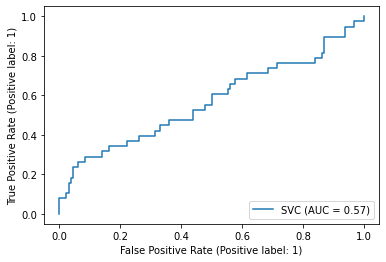

In [46]:
# Calculate confusion matrix, ROC, precision, recall, f1 score, and AUC for training set.
print("Summary of TRAINING SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_training, y_training_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_training_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_training_predicted))
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_training_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_training, y_training_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_training, y_training)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_training, y_training)  
plt.show() 

Summary of TEST SET: 

Confution matrix: 
[[14  7]
 [ 6  3]]

Precision score: 
0.3

Recall Score: 
0.3333333333333333

ROC-AUC Score:
0.5

F1 Score: 
0.3157894736842105

ROC Curve: 


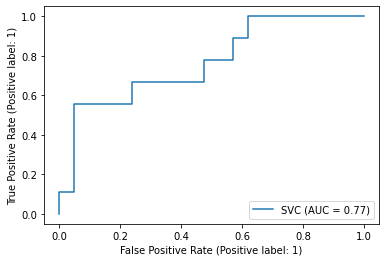

In [47]:
print("Summary of TEST SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Precision score: ")
print(precision_score(y_test, y_test_predicted))
print()

# Recall is tpr
print("Recall Score: ")
tpr = recall_score(y_test, y_test_predicted)
print(tpr)
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_test_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_test, y_test_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_test, y_test)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_test, y_test)  
plt.show() 

The Gaussian Naive Bayes classifer does not perform well either.

### ii) This data set is rather imbalanced. Balance your data set using SMOTE, by downsampling the common class in the training set to 90 instances and upsampling the uncommon class to 90 instances. Use k = 5 nearest neighbors in SMOTE. Remember not to change the balance of the test set. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. Does SMOTE help?

<AxesSubplot:xlabel='class', ylabel='count'>

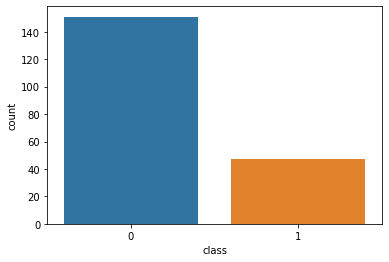

In [48]:
# See current distribution of 0/1 (N/R) labels.
sns.countplot(df['class'])

In [49]:
# if smote works, our f1 score will be higher

In [50]:
training_set

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     18.02    27.60     117.50  1013.0     0.09489      0.10360     0.1086   
1     17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
2     21.37    17.44     137.50  1373.0     0.08836      0.11890     0.1255   
3     11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
6     18.98    19.61     124.40  1112.0     0.09087      0.12370     0.1213   
..      ...      ...        ...     ...         ...          ...        ...   
132   15.08    25.74      98.00   716.6     0.10240      0.09769     0.1235   
135   22.01    21.90     147.20  1482.0     0.10630      0.19540     0.2448   
143   15.50    21.08     102.90   803.1     0.11200      0.15710     0.1522   
145   20.18    19.54     133.80  1250.0     0.11330      0.14890     0.2133   
196   21.42    22.84     145.00  1440.0     0.10700      0.19390     0.2380   

     concave points  symmetry  fractal dimension  ...  worst area  \
0           0.07055    0.1865            0.06333  ...      1436.0   
1           0.14710    0.2419            0.07871  ...      2019.0   
2           0.08180    0.2333            0.06010  ...      1949.0   
3           0.10520    0.2597            0.09744  ...       567.7   
6           0.08910    0.1727            0.05767  ...      1593.0   
..              ...       ...                ...  ...         ...   
132         0.06553    0.1647            0.06464  ...      1050.0   
135         0.15010    0.1824            0.06140  ...      2227.0   
143         0.08481    0.2085            0.06864  ...      1748.0   
145         0.12590    0.1724            0.06053  ...      1479.0   
196         0.13180    0.1884            0.06472  ...      2375.0   

     worst smoothness  worst compactness  worst concavity  \
0              0.1195             0.1926           0.3140   
1              0.1622             0.6656           0.7119   
2              0.1188             0.3449           0.3414   
3              0.2098             0.8663           0.6869   
6              0.1144             0.3371           0.2990   
..                ...                ...              ...   
132            0.1660             0.2356           0.4029   
135            0.1294             0.3885           0.4756   
143            0.1517             0.4002           0.4211   
145            0.1665             0.2942           0.5308   
196            0.1498             0.4379           0.5411   

     worst concave points  worst symmetry  worst fractal dimension  \
0                  0.1170          0.2677                  0.08113   
1                  0.2654          0.4601                  0.11890   
2                  0.2032          0.4334                  0.09067   
3                  0.2575          0.6638                  0.17300   
6                  0.1922          0.2726                  0.09581   
..                    ...             ...                      ...   
132                0.1526          0.2654                  0.09438   
135                0.2432          0.2741                  0.08574   
143                0.2134          0.3003                  0.10480   
145                0.2173          0.3032                  0.08075   
196                0.2215          0.2832                  0.08981   

     tumor size  lymph node  class  
0           5.0           5      0  
1           3.0           2      0  
2           2.5           0      0  
3           2.0           0      0  
6           1.5           1      0  
..          ...         ...    ...  
132         2.6           0      1  
135         3.0           1      1  
143         0.4           0      1  
145         4.5          27      1  
196         3.0           1      1  

[168 rows x 33 columns]

In [51]:
non_reccuring_count, reccuring_count = training_set['class'].value_counts()

In [52]:
# Print the shape of the classes.
print('non-reccuring:', non_reccuring.shape)
print('reccuring:', reccuring.shape)

non-reccuring: (151, 33)
reccuring: (47, 33)


I wasn't able to use the imblearn package and SMOTE method, so I came up with a work-around to downsample andd upsample.

total class of 1 and 0:
0    90
1    47
Name: class, dtype: int64



<AxesSubplot:title={'center':'count (target)'}>

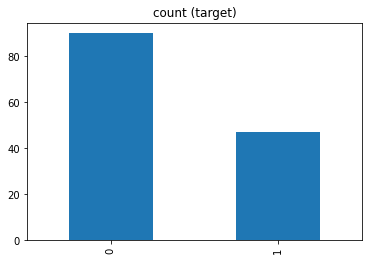

In [53]:
# Downsample Class 0 (non-recurring).
non_reccuring_under = non_reccuring.sample(90)

tr_under = pd.concat([non_reccuring_under, reccuring], axis=0)

print("total class of 1 and 0:")
print(tr_under['class'].value_counts())
# plot the count after under-sampeling
print()
tr_under['class'].value_counts().plot(kind='bar', title='count (target)')

total class of 1 and 0:
0    90
1    47
Name: class, dtype: int64



<AxesSubplot:title={'center':'count (target)'}>

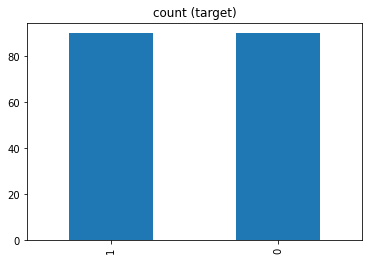

In [54]:
# Upsample Class 1 (recurring).
reccuring_over = reccuring.sample(90, replace=True)

tr_balanced = pd.concat([reccuring_over, non_reccuring_under], axis=0)

print("total class of 1 and 0:")
print(tr_under['class'].value_counts())# plot the count after under-sampling
print()
tr_balanced['class'].value_counts().plot(kind='bar', title='count (target)')

In [55]:
# Check that new training set has 90 rows of Class 0 and 90 rows of Class 1.
tr_balanced

radius  texture  perimeter    area  smoothness  compactness  concavity  \
128   23.51    24.27     155.10  1747.0     0.10690      0.12830    0.23080   
132   15.08    25.74      98.00   716.6     0.10240      0.09769    0.12350   
42    14.25    22.15      96.42   645.7     0.10490      0.20080    0.21350   
81    12.34    26.86      81.15   477.4     0.10340      0.13530    0.10850   
56    17.95    20.01     114.20   982.0     0.08402      0.06722    0.07293   
..      ...      ...        ...     ...         ...          ...        ...   
19    17.14    16.40     116.00   912.7     0.11860      0.22760    0.22290   
99    23.21    26.97     153.50  1670.0     0.09509      0.16820    0.19500   
60    19.79    25.12     130.40  1192.0     0.10150      0.15890    0.25450   
175   21.93    30.64     146.70  1487.0     0.08679      0.17230    0.20530   
25    17.02    23.98     112.80   899.3     0.11970      0.14960    0.24170   

     concave points  symmetry  fractal dimension  ...  worst area  \
128         0.14100    0.1797            0.05506  ...      2906.0   
132         0.06553    0.1647            0.06464  ...      1050.0   
42          0.08653    0.1949            0.07292  ...       959.5   
81          0.04562    0.1943            0.06937  ...       768.9   
56          0.05596    0.2129            0.05025  ...      1261.0   
..              ...       ...                ...  ...         ...   
19          0.14010    0.3040            0.07413  ...      1461.0   
99          0.12370    0.1909            0.06309  ...      2944.0   
60          0.11490    0.2202            0.06113  ...      1589.0   
175         0.10100    0.1796            0.05715  ...      1951.0   
25          0.12030    0.2248            0.06382  ...      1344.0   

     worst smoothness  worst compactness  worst concavity  \
128            0.1515             0.2678           0.4819   
132            0.1660             0.2356           0.4029   
42             0.1640             0.6247           0.6922   
81             0.1785             0.4706           0.4425   
56             0.1072             0.1202           0.2249   
..                ...                ...              ...   
19             0.1545             0.3949           0.3853   
99             0.1481             0.4126           0.5820   
60             0.1275             0.3861           0.5673   
175            0.1168             0.4072           0.4494   
25             0.1634             0.3559           0.5588   

     worst concave points  worst symmetry  worst fractal dimension  \
128                0.2089          0.2593                  0.07738   
132                0.1526          0.2654                  0.09438   
42                 0.1785          0.2844                  0.11320   
81                 0.1459          0.3215                  0.12050   
56                 0.1185          0.4882                  0.06111   
..                    ...             ...                      ...   
19                 0.2550          0.4066                  0.10590   
99                 0.2593          0.3103                  0.08677   
60                 0.1732          0.3305                  0.08465   
175                0.1886          0.2784                  0.07353   
25                 0.1847          0.3530                  0.08482   

     tumor size  lymph node  class  
128         3.5           4      1  
132         2.6           0      1  
42          1.5           0      1  
81          1.2           4      1  
56          3.0           1      1  
..          ...         ...    ...  
19          4.4           1      0  
99          1.5           1      0  
60          3.0          11      0  
175         3.5           0      0  
25          1.3           1      0  

[180 rows x 33 columns]

In [56]:
# Create a new data frame that excludes rows with '?' for lymph node feature.
known_ln = tr_balanced.loc[df['lymph node'] != "?"]

# Find the median of the new dataframe
median_ln = known_ln['lymph node'].median()
print("Median of Lymph Node Size in Training Set: ", median_ln)

Median of Lymph Node Size in Training Set:  1.0


In [57]:
# Replace all '?' with 2 in the training set.
tr_balanced['lymph node'] = tr_balanced['lymph node'].replace(['?'],median_ln)
tr_balanced

radius  texture  perimeter    area  smoothness  compactness  concavity  \
128   23.51    24.27     155.10  1747.0     0.10690      0.12830    0.23080   
132   15.08    25.74      98.00   716.6     0.10240      0.09769    0.12350   
42    14.25    22.15      96.42   645.7     0.10490      0.20080    0.21350   
81    12.34    26.86      81.15   477.4     0.10340      0.13530    0.10850   
56    17.95    20.01     114.20   982.0     0.08402      0.06722    0.07293   
..      ...      ...        ...     ...         ...          ...        ...   
19    17.14    16.40     116.00   912.7     0.11860      0.22760    0.22290   
99    23.21    26.97     153.50  1670.0     0.09509      0.16820    0.19500   
60    19.79    25.12     130.40  1192.0     0.10150      0.15890    0.25450   
175   21.93    30.64     146.70  1487.0     0.08679      0.17230    0.20530   
25    17.02    23.98     112.80   899.3     0.11970      0.14960    0.24170   

     concave points  symmetry  fractal dimension  ...  worst area  \
128         0.14100    0.1797            0.05506  ...      2906.0   
132         0.06553    0.1647            0.06464  ...      1050.0   
42          0.08653    0.1949            0.07292  ...       959.5   
81          0.04562    0.1943            0.06937  ...       768.9   
56          0.05596    0.2129            0.05025  ...      1261.0   
..              ...       ...                ...  ...         ...   
19          0.14010    0.3040            0.07413  ...      1461.0   
99          0.12370    0.1909            0.06309  ...      2944.0   
60          0.11490    0.2202            0.06113  ...      1589.0   
175         0.10100    0.1796            0.05715  ...      1951.0   
25          0.12030    0.2248            0.06382  ...      1344.0   

     worst smoothness  worst compactness  worst concavity  \
128            0.1515             0.2678           0.4819   
132            0.1660             0.2356           0.4029   
42             0.1640             0.6247           0.6922   
81             0.1785             0.4706           0.4425   
56             0.1072             0.1202           0.2249   
..                ...                ...              ...   
19             0.1545             0.3949           0.3853   
99             0.1481             0.4126           0.5820   
60             0.1275             0.3861           0.5673   
175            0.1168             0.4072           0.4494   
25             0.1634             0.3559           0.5588   

     worst concave points  worst symmetry  worst fractal dimension  \
128                0.2089          0.2593                  0.07738   
132                0.1526          0.2654                  0.09438   
42                 0.1785          0.2844                  0.11320   
81                 0.1459          0.3215                  0.12050   
56                 0.1185          0.4882                  0.06111   
..                    ...             ...                      ...   
19                 0.2550          0.4066                  0.10590   
99                 0.2593          0.3103                  0.08677   
60                 0.1732          0.3305                  0.08465   
175                0.1886          0.2784                  0.07353   
25                 0.1847          0.3530                  0.08482   

     tumor size  lymph node  class  
128         3.5           4      1  
132         2.6           0      1  
42          1.5           0      1  
81          1.2           4      1  
56          3.0           1      1  
..          ...         ...    ...  
19          4.4           1      0  
99          1.5           1      0  
60          3.0          11      0  
175         3.5           0      0  
25          1.3           1      0  

[180 rows x 33 columns]

In [58]:
# Check that there are no more rows with '?' for lymph node feature in the balanced training set.
unknown_ln = tr_balanced.loc[tr_balanced['lymph node'] == "?"]
unknown_ln

Empty DataFrame
Columns: [radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, tumor size, lymph node, class]
Index: []

[0 rows x 33 columns]

In [59]:
# Separate test set into x_training and y_training
x_training = tr_balanced.iloc[:, :-1].values
y_training = tr_balanced.iloc[:, 32].values
x_training = pd.DataFrame(x_training, columns=['radius','texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity',
       'concave points', 'symmetry', 'fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension', 'tumor size','lymph node'])

In [60]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [61]:
y_training_predicted = gaus_nb.predict(x_training)
y_training_predicted

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0])

Summary of TRAINING SET: 

Confution matrix: 
[[67 23]
 [41 49]]

Precision score: 
0.6805555555555556

Recall Score: 
0.5444444444444444

ROC-AUC Score:
0.6444444444444444

F1 Score: 
0.6049382716049382

ROC Curve: 


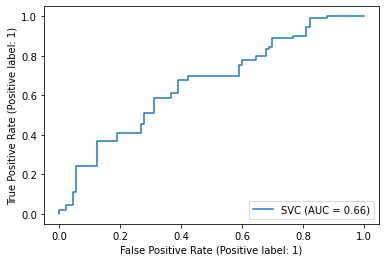

In [62]:
print("Summary of TRAINING SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_training, y_training_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_training_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_training_predicted))
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_training_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_training, y_training_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_training, y_training)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_training, y_training)  
plt.show() 

In [63]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0])

Summary of TEST SET: 

Confution matrix: 
[[14  7]
 [ 5  4]]

Precision score: 
0.36363636363636365

Recall Score: 
0.4444444444444444

ROC-AUC Score:
0.5555555555555556

F1 Score: 
0.39999999999999997

ROC Curve: 


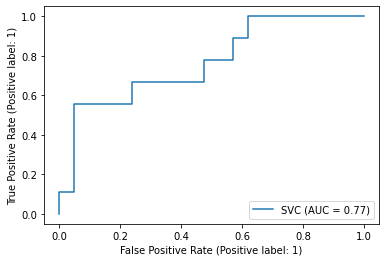

In [64]:
print("Summary of TEST SET: ")
print()

print("Confution matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Precision score: ")
print(precision_score(y_test, y_test_predicted))
print()

# Recall is tpr
print("Recall Score: ")
tpr = recall_score(y_test, y_test_predicted)
print(tpr)
print()

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_test_predicted))
print()

# Only report results for the class specified by pos_label. 
print("F1 Score: ")
print(f1_score(y_test, y_test_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
clf = svm.SVC(random_state=0)
clf.fit(x_test, y_test)
SVC(random_state=0)
metrics.plot_roc_curve(clf, x_test, y_test)  
plt.show() 

Before downsampling and upsampling, the F1 Score for the training set was 0.40909090909090906 and the F1 Score for the test set was 0.3157894736842105, After downsampling and upsampling, the F1 Score for the training set is 0.6589595375722543 and the F1 Score for the test set is 0.4761904761904762. So yes, the downsampling and upsampling the training set did help.